# **LINEAR REGRESSION**

In the last lab, you learn't about the Exploratory Data Analysis (EDA) which have a lot of importance before performing any task on the data. Afterwards, you did linear regression using the Ordinary Least Squares (OLS) method.

In this lab, you would perform **Linear Regression** on various datasets using **Gradient Descent** Method.

**DATA SETS**

From your last lab's knowledge you know that any dataset from real world can be imported as a **Dataframe** and be processed on.

But, this time direclty import the datasets from the scikit module.
Yes, scikit-learn has some inbuilt-datasets too. These however are small datasets for experimentations and learning as you would do now.

---
Refer the following links to import the respective datasets

[**Diabetes Dataset**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)

[**California Housing Dataset**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)


**TASK 1**:



1.   Import these Datasets in your notebook.
2.   Treat the last column of the datasets as the Depedent Variable (Y) with the other columns as Independent variables.
1.  Do the sufficient EDA as per your needs with justifiable reasonings.







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import SGDRegressor

In [ ]:
diabetes = load_diabetes(scaled=False)
housing = fetch_california_housing()

df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)

df_diabetes['Target'] = diabetes.target
df_housing['Target'] = housing.target

In [ ]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [ ]:
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df_diabetes.dtypes

,0
age,float64
sex,float64
bmi,float64
bp,float64
s1,float64
s2,float64
s3,float64
s4,float64
s5,float64
s6,float64


In [ ]:
df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [ ]:
df_diabetes.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


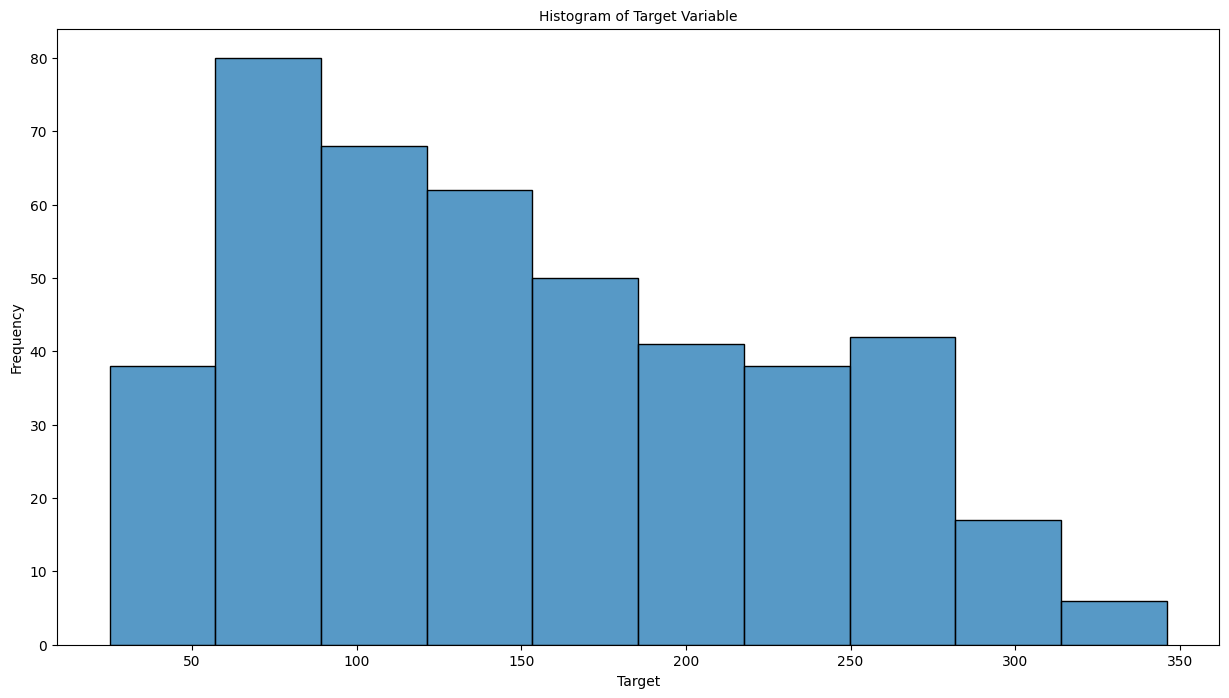

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(df_diabetes['Target'])
plt.xlabel('Target',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.title('Histogram of Target Variable',fontsize=10)
plt.show()

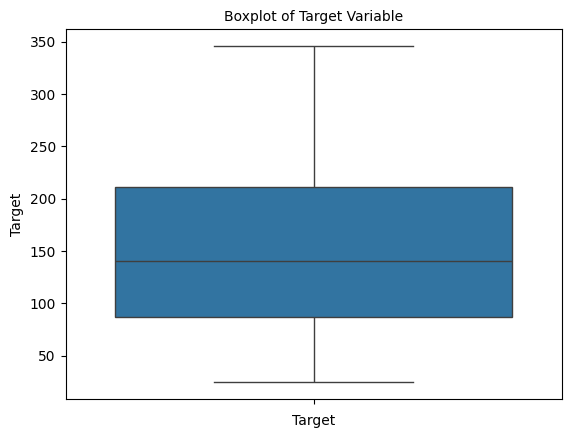

In [ ]:
sns.boxplot(df_diabetes['Target'])
plt.xlabel('Target',fontsize=10)
plt.title('Boxplot of Target Variable',fontsize=10)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

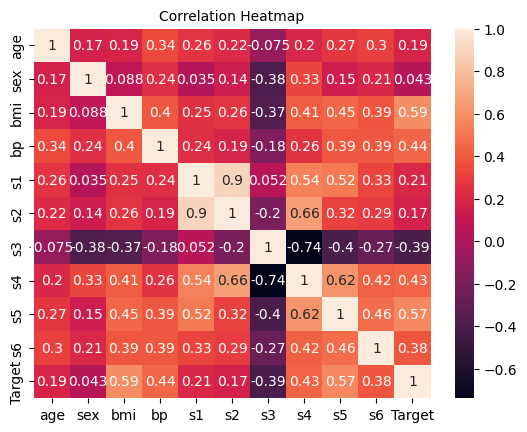

In [ ]:
sns.heatmap(df_diabetes.corr(),annot=True)
plt.title('Correlation Heatmap',fontsize=10)

In [ ]:
df_diabetes_1=df_diabetes.drop('s1',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data=pd.DataFrame()
vif_data['features']=df_diabetes_1.drop('Target',axis=1).columns
vif_data['VIF']=[variance_inflation_factor(df_diabetes_1.drop('Target',axis=1).values,i) for i in range(len(df_diabetes_1.drop('Target',axis=1).columns))]
print(vif_data)

  features         VIF
0      age   17.836460
1      sex   11.418630
2      bmi   52.332153
3       bp   69.113347
4       s2   44.021951
5       s3   37.832450
6       s4   81.318747
7       s5  158.763530
8       s6   90.472517


In [ ]:
df_diabetes_1=df_diabetes_1.drop(['s5'],axis=1)

In [ ]:
df_diabetes.Target.skew()

0.44056293407014124

In [ ]:
from scipy.stats import shapiro
from scipy import stats

In [ ]:
stats,p = shapiro(df_diabetes['Target'])
print('stats:%.3f,p value:%.3f' %(stats,p))

stats:0.949,p value:0.000


Text(0.5, 1.0, 'Histogram of Target Variable')

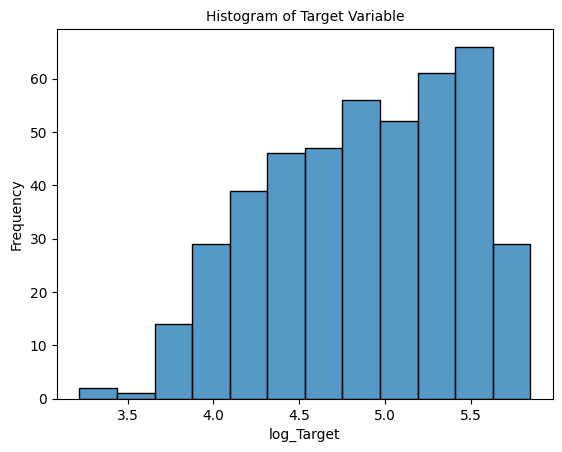

In [ ]:
sns.histplot(np.log(df_diabetes['Target']))
plt.xlabel('log_Target',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.title('Histogram of Target Variable',fontsize=10)

In [ ]:
stats,p = shapiro(np.log(df_diabetes['Target']))
print('stats:%.3f,p value:%.3f' %(stats,p))

stats:0.966,p value:0.000


In [ ]:
np.log(df_diabetes['Target']).skew()

-0.3325670604728491

In [ ]:
df_housing.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
Target,float64


In [ ]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
df_housing.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Target,0


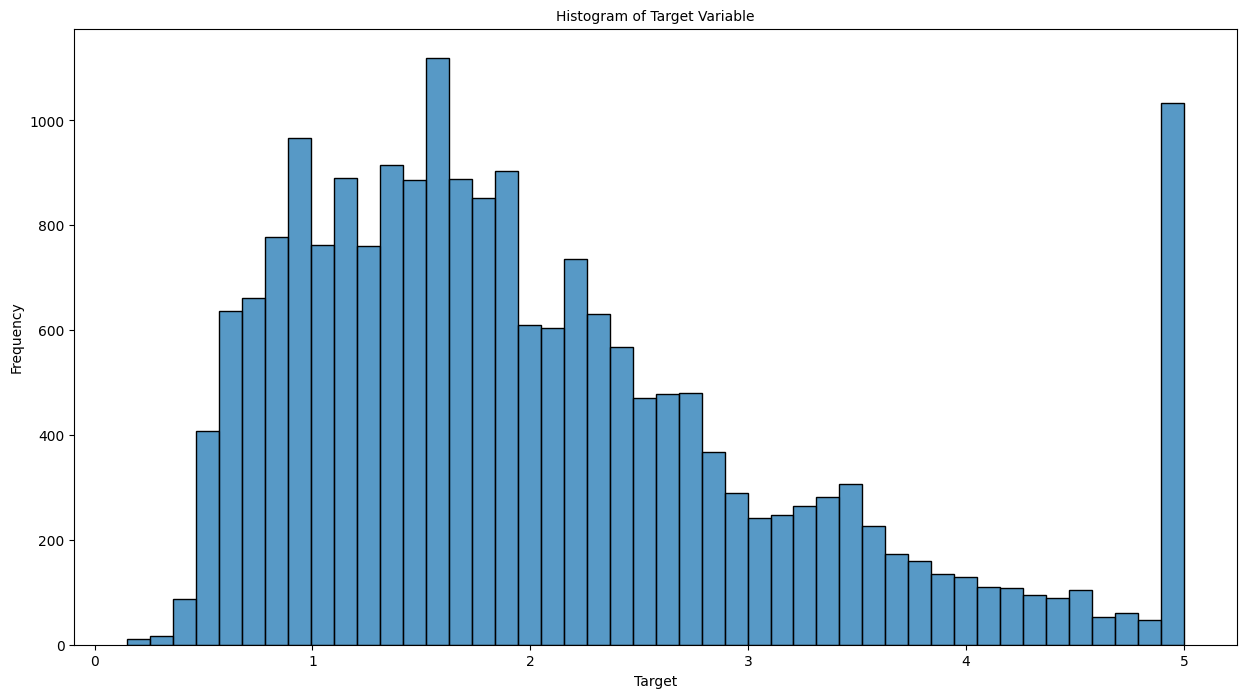

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(df_housing['Target'])
plt.xlabel('Target',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.title('Histogram of Target Variable',fontsize=10)
plt.show()

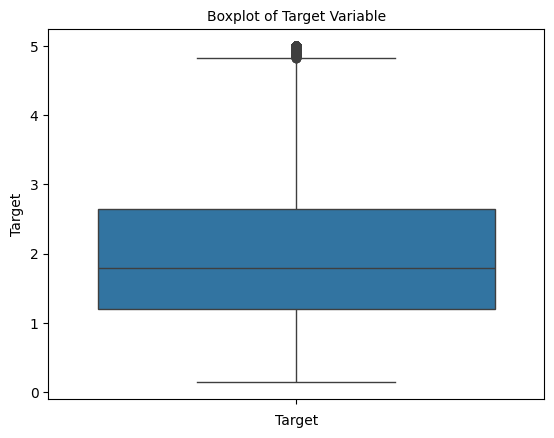

In [ ]:
sns.boxplot(df_housing['Target'])
plt.xlabel('Target',fontsize=10)
plt.title('Boxplot of Target Variable',fontsize=10)
plt.show()

In [ ]:
df_housing = df_housing[df_housing['Target']<4.9]

Text(0.5, 1.0, 'Correlation Heatmap')

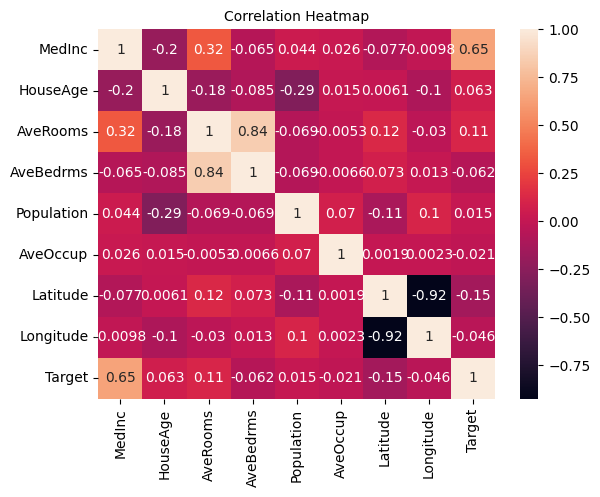

In [ ]:
sns.heatmap(df_housing.corr(),annot=True)
plt.title('Correlation Heatmap',fontsize=10)

In [ ]:
df_housing_1=df_housing.drop(['AveBedrms','Longitude'],axis=1)

In [ ]:
vif_data=pd.DataFrame()
vif_data['features']=df_housing_1.drop('Target',axis=1).columns
vif_data['VIF']=[variance_inflation_factor(df_housing_1.drop('Target',axis=1).values,i) for i in range(len(df_housing_1.drop('Target',axis=1).columns))]
print(vif_data)

     features        VIF
0      MedInc   7.156020
1    HouseAge   6.831993
2    AveRooms   7.618746
3  Population   2.779045
4    AveOccup   1.092621
5    Latitude  21.841079


In [ ]:
stats,p = shapiro(df_housing['Target'])
print('stats:%.3f,p value:%.3f' %(stats,p))

stats:0.948,p value:0.000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19608.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
from scipy.stats import jarque_bera
stats,p = jarque_bera(df_housing['Target'])
print('stats:%.3f,p value:%.3f' %(stats,p))

stats:1963.245,p value:0.000


In [ ]:
df_housing.Target.skew()

0.7745021465771945

In [ ]:
stats,p = jarque_bera(np.log(df_housing['Target']))
print('stats:%.3f,p value:%.3f' %(stats,p))

stats:423.025,p value:0.000


In [ ]:
np.log(df_housing.Target).skew()

-0.30870065085761017

**TASK 2**:


1.   Split the data into Train (85%) and Test Set (15%).




In [ ]:
x_train_d,x_test_d,y_train_d,y_test_d=train_test_split(df_diabetes_1.drop('Target',axis=1),df_diabetes_1['Target'],test_size=0.15,random_state=42)
x_train_h,x_test_h,y_train_h,y_test_h=train_test_split(df_housing_1.drop('Target',axis=1),df_housing_1['Target'],test_size=0.15,random_state=42)

**TASK 3**


1.   Implement a Linear Regression Model with Stochastic Gradient Descent Method.
2.   The implementation of the stochastic gradient descent method should be as per the method taught in the theory class. Make sure the update rule's implementation should be done by you **(No inbuilt direct function should be used for this task).**
3.   Try different values of the learning rates and epochs. Understand their effects on the training process.
4.   Make sure to have multiple 2D plots for the loss function w.r.t. Iterations and Epochs for different learning rates.



In [ ]:
def sgd_regression(x, y, lr, epochs):
    weights=np.zeros(x.shape[1])
    bias=0
    n_samples = x.shape[0]
    losses = []

    for epoch in range(epochs):
        total_loss = 0

        for i in range(n_samples):
            rand_index = np.random.randint(n_samples)
            x_i = x.iloc[rand_index]
            y_i = y.iloc[rand_index]

            prediction = np.dot(x_i, weights) + bias

            dw = (prediction - y_i) * x_i
            db = (prediction - y_i)

            dw = np.clip(dw, -10, 10)
            db = np.clip(db, -10, 10)

            weights -= lr * dw
            bias -= lr * db

            loss = (prediction - y_i) ** 2
            total_loss += loss

        losses.append(total_loss / n_samples)

    return weights, bias, losses

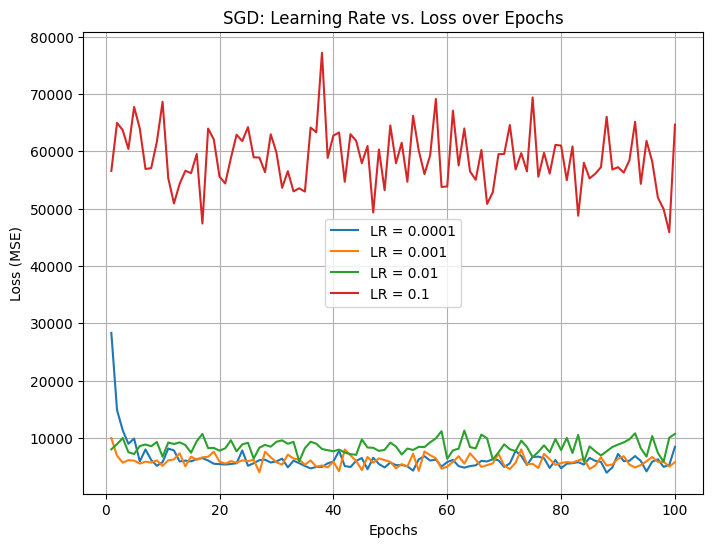

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
epochs = 100

plt.figure(figsize=(8, 6))

for lr in learning_rates:
    _, _, losses = sgd_regression(x_test_d, y_train_d,lr,epochs)
    plt.plot(range(1, epochs + 1), losses, label=f'LR = {lr}')

plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("SGD: Learning Rate vs. Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()

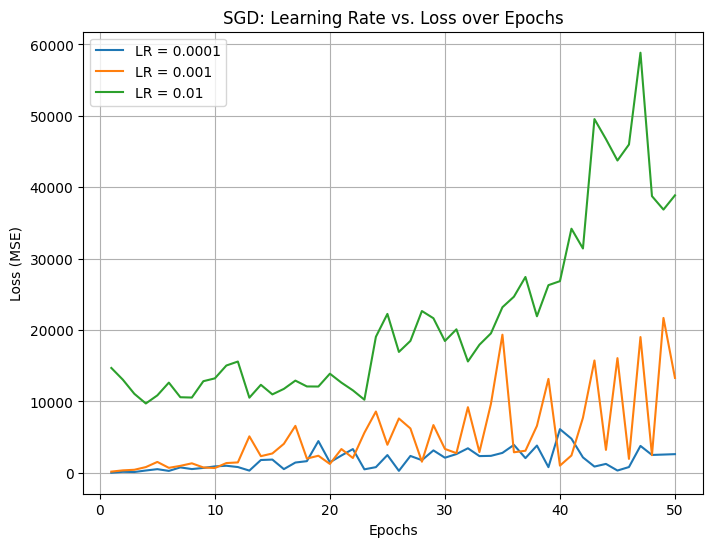

In [42]:
learning_rates = [0.0001, 0.001, 0.01]
epochs = 50

plt.figure(figsize=(8, 6))

for lr in learning_rates:
    _, _, losses = sgd_regression(x_test_h, y_train_h,lr,epochs)
    plt.plot(range(1, epochs + 1), losses, label=f'LR = {lr}')

plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("SGD: Learning Rate vs. Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()

**TASK 4**:
  

1.   Test the above model on the Test set as already split above.
2.   Report the final performance metrics (RMSE, MAE,R² ).



In [45]:
w,b,losses = sgd_regression(x_train_d, y_train_d, lr=0.001, epochs=100)
y_pred_d = np.dot(x_test_d, w) + b

rmse_d = np.sqrt(mean_squared_error(y_test_d, y_pred_d))
mae_d = mean_absolute_error(y_test_d, y_pred_d)
r2_d = r2_score(y_test_d, y_pred_d)

print(f"RMSE: {rmse_d:.4f}")
print(f"MAE: {mae_d:.4f}")
print(f"R_squared Score: {r2_d:.4f}")

RMSE: 71.3582
MAE: 60.3004
R_squared Score: 0.0679


In [47]:
w,b,losses = sgd_regression(x_train_h, y_train_h, lr=0.0001, epochs=25)
y_pred_h = np.dot(x_test_h, w) + b

rmse_h = np.sqrt(mean_squared_error(y_test_h, y_pred_h))
mae_h = mean_absolute_error(y_test_h, y_pred_h)
r2_h = r2_score(y_test_h, y_pred_h)

print(f"RMSE: {rmse_h:.4f}")
print(f"MAE: {mae_h:.4f}")
print(f"R_squared Score: {r2_h:.4f}")

RMSE: 94.5605
MAE: 24.0490
R_squared Score: -9355.5070


**TASK 5**:
  

1.   Do the same once again, but this time use the inbuilt gradient descent algorithm (**SGDRegressor**).
2.   And compare the performance metrics (RMSE, MAE, R² ) with your own implementation of Gradient Descent as attained above.



In [78]:
sgd = SGDRegressor(learning_rate='constant',eta0=0.001,max_iter=1000,tol=1e-5)
sgd.fit(x_train_d,y_train_d)

y_pred_sklearn_d = sgd.predict(x_test_d)

rmse_sklearn_d = np.sqrt(mean_squared_error(y_test_d, y_pred_sklearn_d))
mae_sklearn_d = mean_absolute_error(y_test_d, y_pred_sklearn_d)
r2_sklearn_d = r2_score(y_test_d, y_pred_sklearn_d)

print(f"RMSE: {rmse_sklearn_d:.4f}")
print(f"MAE: {mae_sklearn_d:.4f}")
print(f"R² Score: {r2_sklearn_d:.4f}")

RMSE: 21610426726073.9844
MAE: 21359599552011.2773
R² Score: -85489181283941538070528.0000


In [81]:
sgd = SGDRegressor(learning_rate='constant', eta0=0.001, max_iter=100, random_state=42)
sgd.fit(x_train_h, y_train_h)

y_pred_sklearn_h = sgd.predict(x_test_h)

rmse_sklearn_h = np.sqrt(mean_squared_error(y_test_h, y_pred_sklearn_h))
mae_sklearn_h = mean_absolute_error(y_test_h, y_pred_sklearn_h)
r2_sklearn_h = r2_score(y_test_h, y_pred_sklearn_h)

print(f"RMSE: {rmse_sklearn_h:.4f}")
print(f"MAE: {mae_sklearn_h:.4f}")
print(f"R² Score: {r2_sklearn_h:.4f}")

RMSE: 8090731690820901.0000
MAE: 6444671481055516.0000
R² Score: -68496732941526449017286744342528.0000


**TASK 6**:


1.   The above tasks should be done for both the datasets as imported in *Task 1*.
2.   And, you must analyze the difference in the results that you get in *Task 4* and *Task 5*.



In [82]:

print("Scikit-Learn SGDRegressor Results:")
print(f"RMSE: {rmse_sklearn_d:.4f}")
print(f"MAE: {mae_sklearn_d:.4f}")
print(f"R² Score: {r2_sklearn_d:.4f}")

print("Implemented SGDRegressor Results:")
print(f"RMSE: {rmse_d:.4f}")
print(f"MAE: {mae_d:.4f}")
print(f"R_squared Score: {r2_d:.4f}")


Scikit-Learn SGDRegressor Results:
RMSE: 21610426726073.9844
MAE: 21359599552011.2773
R² Score: -85489181283941538070528.0000
Implemented SGDRegressor Results:
RMSE: 71.3582
MAE: 60.3004
R_squared Score: 0.0679


In [83]:
print("Scikit-Learn SGDRegressor Results:")
print(f"RMSE: {rmse_sklearn_h:.4f}")
print(f"MAE: {mae_sklearn_h:.4f}")
print(f"R² Score: {r2_sklearn_h:.4f}")

print("Implemented SGDRegressor Results:")
print(f"RMSE: {rmse_h:.4f}")
print(f"MAE: {mae_h:.4f}")
print(f"R_squared Score: {r2_h:.4f}")

Scikit-Learn SGDRegressor Results:
RMSE: 8090731690820901.0000
MAE: 6444671481055516.0000
R² Score: -68496732941526449017286744342528.0000
Implemented SGDRegressor Results:
RMSE: 94.5605
MAE: 24.0490
R_squared Score: -9355.5070
